In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

In [2]:
%matplotlib inline

### make copy

In [3]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

### dataset content and structure

In [5]:
train.columns, test.columns # we have to predict count for the test file

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [7]:
train.shape, test.shape

((18288, 3), (5112, 2))

### feature extraction

In [8]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [9]:
for tm in (train, test, train_original, test_original):
    tm['year'] = tm.Datetime.dt.year
    tm['month'] = tm.Datetime.dt.month
    tm['day'] = tm.Datetime.dt.day
    tm['Hour'] = tm.Datetime.dt.hour

In [10]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


### | monday = 0 | tuesday = 1 | wednesday = 2 | thursday = 3 | friday = 4 | saturday = 5 | sunday = 6 |

In [11]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [12]:
# 1 for the week day (5 or 6) else 0
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else: return 0

In [13]:
temp2 = train['Datetime'].apply(applyer) # function call without args
train['weekend'] = temp2

### time series

### There is an increasing trend in the series i.e., the number of count is increasing with respect to time. Certain points, there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

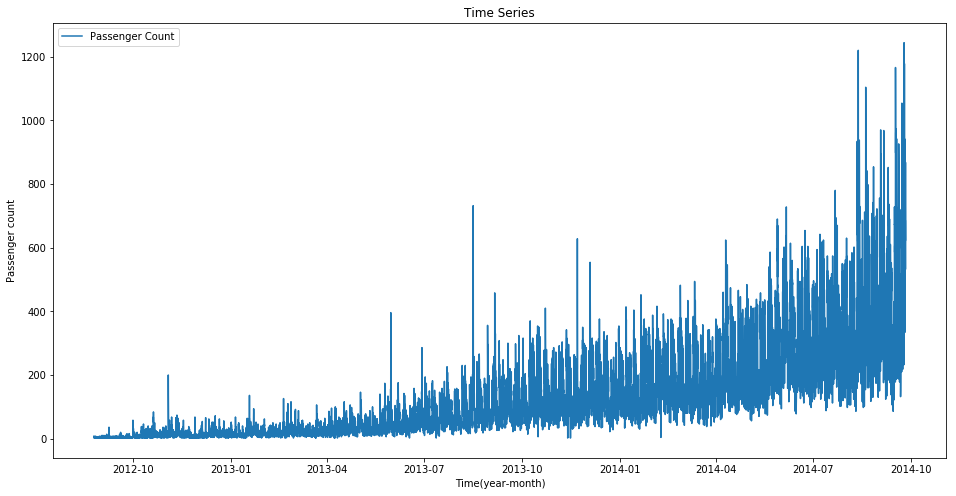

In [14]:
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize=(16, 8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc='best')

## general hypothesis

### > traffic will increase as the years pass by
### > traffic will be high from may to october
### > traffic on weekdays will be more
### > traffic during the peak hours will be high

## exploratory analysis

In [15]:
train.groupby('year')['Count'].mean()

year
2012     11.282946
2013     78.306849
2014    283.017102
Name: Count, dtype: float64

### 1 exponential growth -- validates our hypothesis

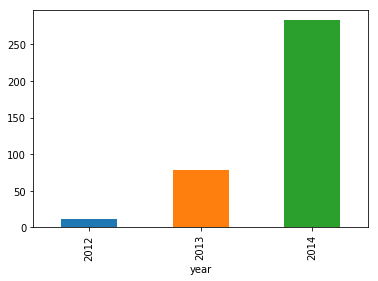

In [16]:
train.groupby('year')['Count'].mean().plot.bar()

### 2 may to october -- traffic increase

In [17]:
train.groupby('month')['Count'].mean()

month
1      92.817204
2     111.196429
3     103.791667
4     137.680556
5     155.055108
6     186.723611
7     209.071237
8     220.497585
9     181.958824
10     75.459677
11     78.413889
12     86.533602
Name: Count, dtype: float64

### months 10, 11, 12 seems to be less -- doesn't look good

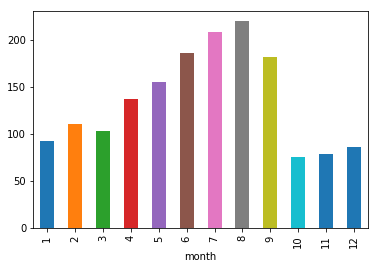

In [18]:
train.groupby('month')['Count'].mean().plot.bar()

In [19]:
train.groupby(['year', 'month'])['Count'].mean()

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

### 2014 year, 10, 11, 12 months are not present

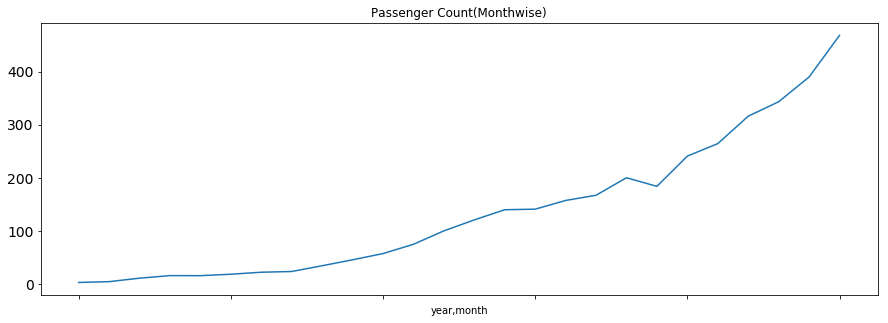

In [20]:
temp3 = train.groupby(['year', 'month'])['Count'].mean()
temp3.plot(figsize=(15,5), title='Passenger Count(Monthwise)', fontsize=14)

### daily passenger count

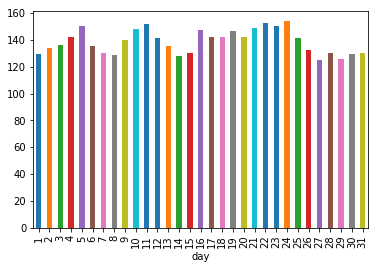

In [21]:
train.groupby('day')['Count'].mean().plot.bar()

### peak hours

### peak traffic is at 7pm, decreasing trend till 5am and increasing trend from 11am to 12 noon

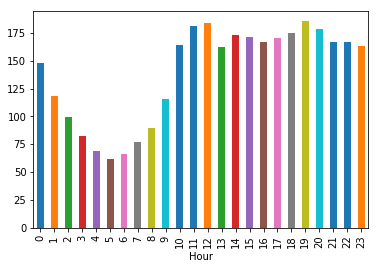

In [22]:
train.groupby('Hour')['Count'].mean().plot.bar()

### traffic on weekdays

### weekends -- traffic is more

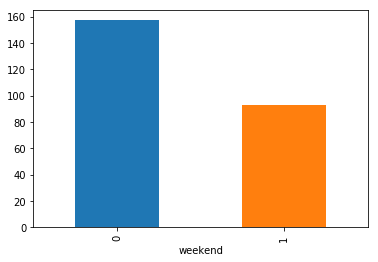

In [23]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [24]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


###  day of week -- passenger count is less on weekends --> 5, 6 

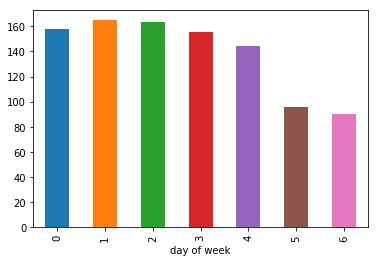

In [25]:
train.groupby('day of week')['Count'].mean().plot.bar()

### basic modelling

In [26]:
train = train.drop('ID', axis=1)

In [27]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [28]:
train['Timestamp'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']

### hourly time series

In [29]:
hourly = train.resample('H').mean() # H stands for hours

### converting to daily mean

In [30]:
daily = train.resample('D').mean() # D stands for days

### converting to weekly mean

In [31]:
weekly = train.resample('W').mean() # W stands for weeks

### converting to monthly mean

In [32]:
monthly = train.resample('M').mean() # M stands for months

### subplots

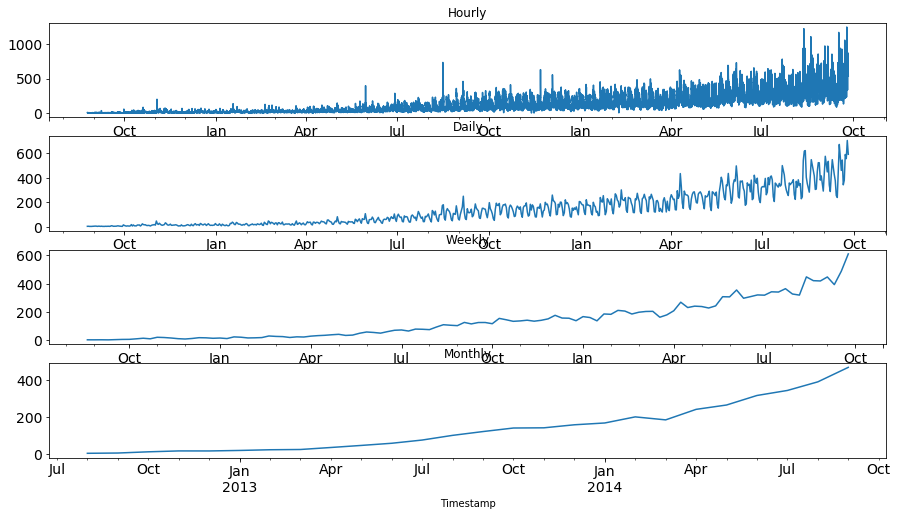

In [33]:
fig, axs = plt.subplots(4, 1)

hourly.Count.plot(figsize=(15, 8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15, 8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15, 8), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15, 8), title='Monthly', fontsize=14, ax=axs[3])

plt.show()

### we will on daily time series -- predictions

In [34]:
test['Timestamp'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']

# converting into daily mean
test = test.resample('D').mean()

train['Timestamp'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']

# converting into daily mean
train = train.resample('D').mean()

In [35]:
train.head()

,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [36]:
daily.head()

,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [37]:
test.head()

,ID,year,month,day,Hour
Timestamp,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


# Splitting data - training and validation 

### last 3 months for validation and the rest is for training. Splitting is not done randomly

In [38]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

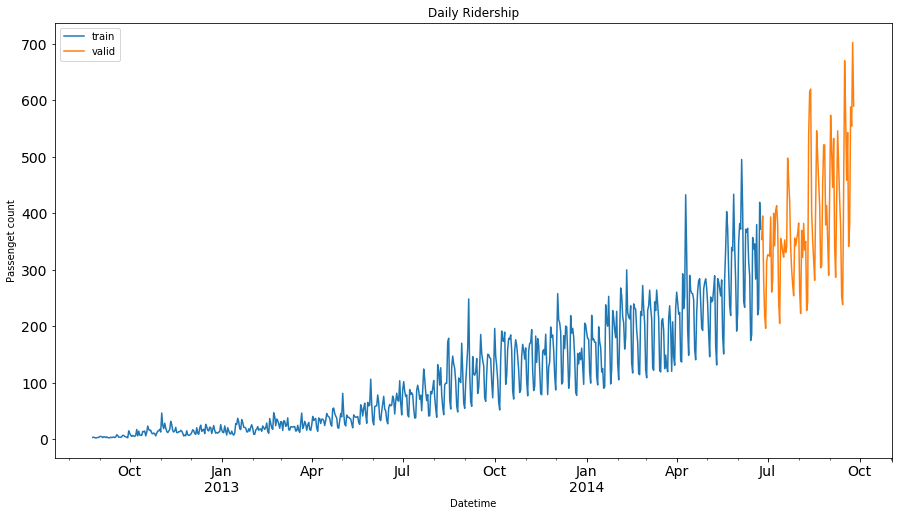

In [39]:
Train.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenget count')
plt.legend(loc='best')
plt.show()

## Modelling Techniques

### naive approach -- straight horizontal line as prediction

In [40]:
vals = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = vals[len(vals)-1]

In [41]:
y_hat.naive.head()

Timestamp
2014-06-25    372.166667
2014-06-26    372.166667
2014-06-27    372.166667
2014-06-28    372.166667
2014-06-29    372.166667
Freq: D, Name: naive, dtype: float64

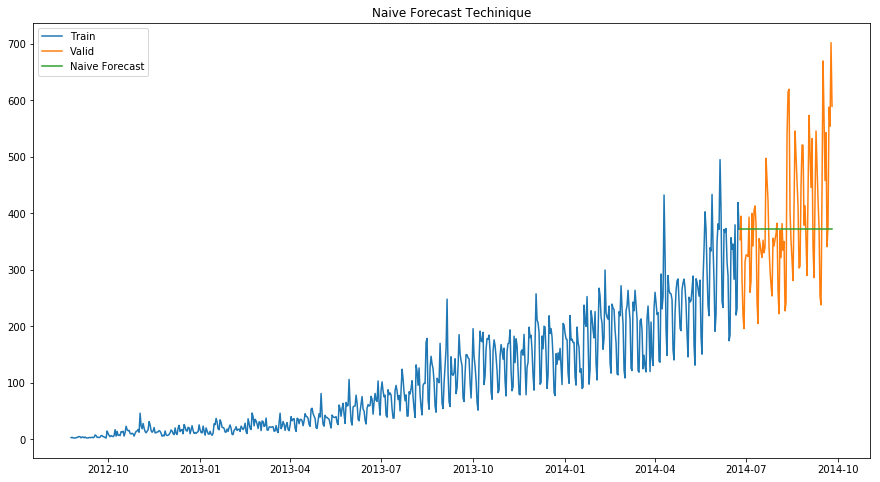

In [42]:
plt.figure(figsize=(15, 8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast Techinique')
plt.show()

### accuracy check -- rmse (standard deviation of the residuals)
$$rmse = \sqrt{\sum_{i=1}^{n} \frac{1}{N} (p - a)^2}$$

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [44]:
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) # observed values and predicted values
rms

111.79050467496724

### moving averages

### avg of last 10 observations

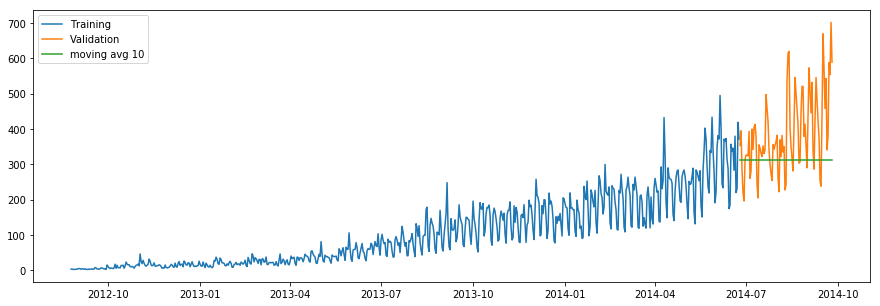

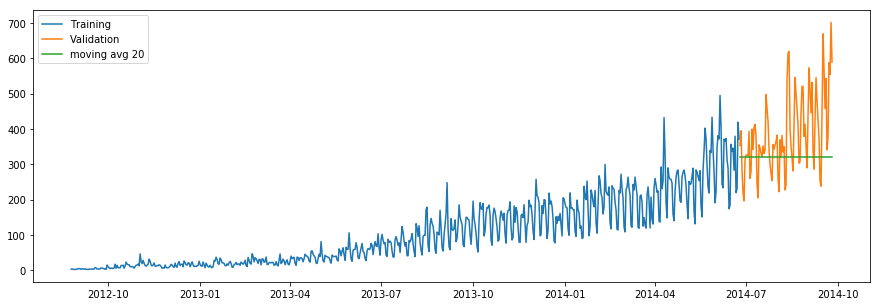

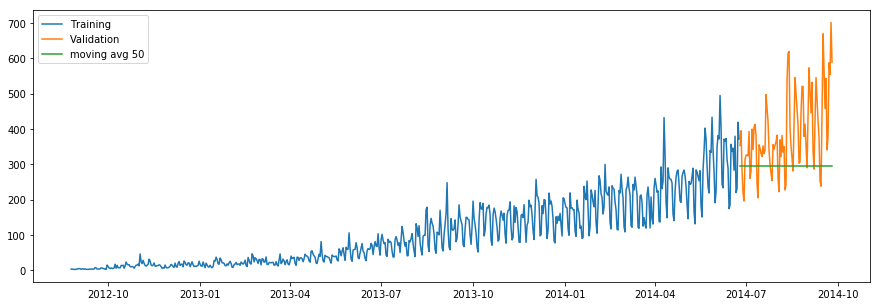

In [45]:
y_hat_avg_10 = valid.copy()
y_hat_avg_10['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_10['moving_avg_forecast'], label='moving avg 10')
plt.legend(loc='best')
plt.show()
y_hat_avg_20 = valid.copy()
y_hat_avg_20['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_20['moving_avg_forecast'], label='moving avg 20')
plt.legend(loc='best')
plt.show()
y_hat_avg_50 = valid.copy()
y_hat_avg_50['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_50['moving_avg_forecast'], label='moving avg 50')
plt.legend(loc='best')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(valid['Count'], y_hat_avg_50['moving_avg_forecast']))
rms

144.19175679986802

### exponential smoothing

### smallest weights are associated with the oldest observations and viceversa

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

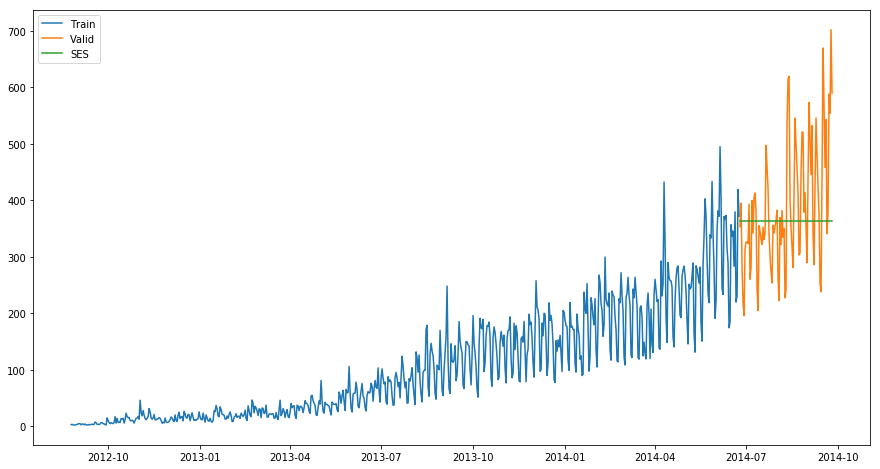

In [48]:
y_hat_exp = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_exp['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(15, 8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_exp['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [49]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_exp['SES']))
rms

113.43708111884514

## holt's linear trend model

### seasonality and error in the series

In [50]:
import statsmodels.api as sm

### increasing trend can be seen in the dataset

<Figure size 1080x576 with 0 Axes>

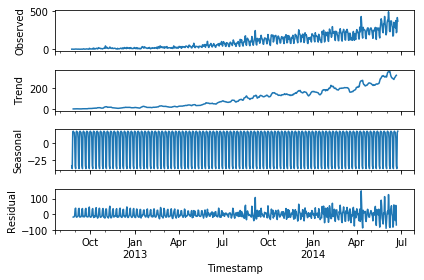

In [51]:
plt.figure(figsize=(15, 8))
sm.tsa.seasonal_decompose(Train['Count']).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [52]:
result

(2.9863509590138575,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

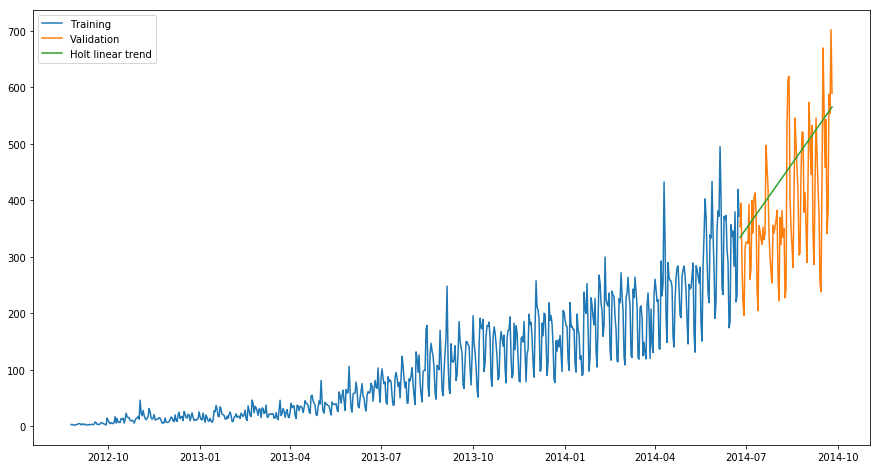

In [53]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(15, 8))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_holt['Holt_linear'], label='Holt linear trend')
plt.legend(loc='best')
plt.show()

In [54]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_holt['Holt_linear']))
rms

112.94278345314041

### holt winter model

In [55]:
y_hat_winter = valid.copy()
fit3 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()

In [56]:
fit3

In [57]:
y_hat_winter['Holt_winter'] = fit3.forecast(len(valid))

In [59]:
print(y_hat_winter['Holt_winter'].tolist())

[387.3595603759282, 369.13573794552303, 355.5620237379009, 247.08985081406735, 246.19339873379107, 385.87795611766074, 376.8013797740973, 390.85280249235626, 372.6289800619511, 359.0552658543289, 250.5830929304954, 249.68664085021913, 389.3711982340888, 380.2946218905253, 394.3460446087843, 376.12222217837916, 362.548507970757, 254.07633504692342, 253.1798829666472, 392.8644403505169, 383.7878640069534, 397.83928672521233, 379.6154642948072, 366.04175008718505, 257.5695771633515, 256.6731250830752, 396.35768246694494, 387.28110612338145, 401.3325288416404, 383.10870641123523, 369.5349922036131, 261.06281927977955, 260.16636719950327, 399.85092458337294, 390.7743482398095, 404.82577095806846, 386.6019485276633, 373.0282343200411, 264.5560613962076, 263.65960931593133, 403.344166699801, 394.2675903562375, 408.3190130744965, 390.09519064409136, 376.5214764364692, 268.0493035126356, 267.1528514323594, 406.8374088162291, 397.7608324726656, 411.81225519092453, 393.5884327605194, 380.01471855

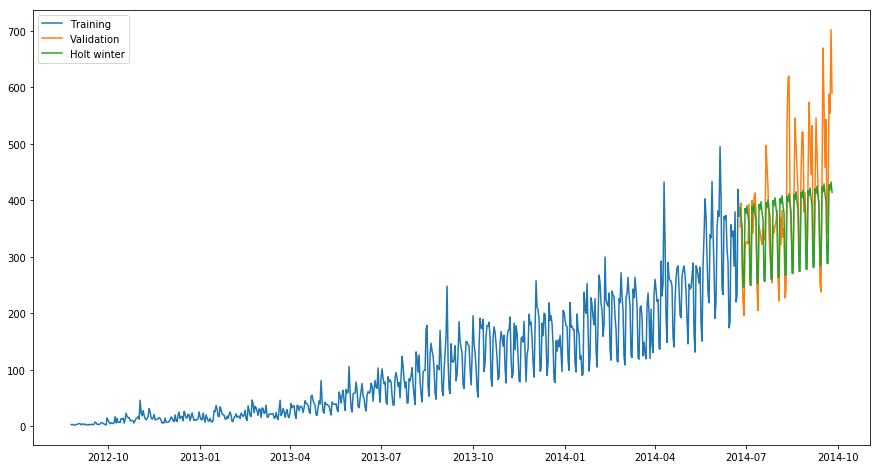

In [61]:
plt.figure(figsize=(15, 8))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_winter['Holt_winter'], label='Holt winter')
plt.legend(loc='best')
plt.show()